# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [2]:
import numpy
import matplotlib.pyplot as plt


---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

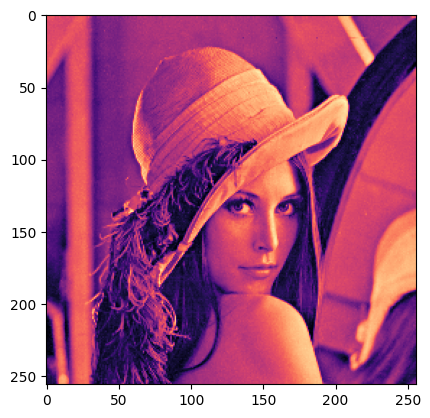

In [3]:
lena = plt.imread("data/lena.png")
plt.imshow(lena, "magma")


**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [4]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    neighborhood_mean = 0
    for p in numpy.ndindex(img.shape[1]-2*n, img.shape[0]-2*n):
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
            # write your code here
            xpos = p[1] + q[1]
            ypos = p[0] + q[0]
            neighborhood_sum = neighborhood_sum + img[xpos, ypos]   
        neighborhood_mean = neighborhood_sum/(size*size)
        result[p[1]+n, p[0]+n] = neighborhood_mean

        # ...
    # write your code here
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

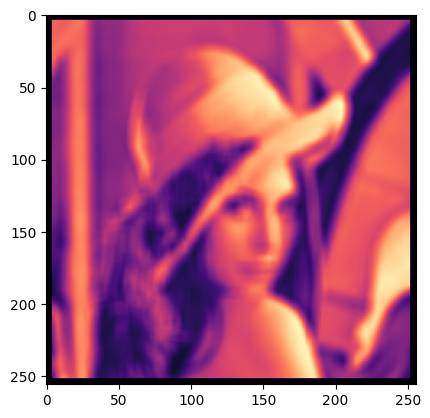

In [5]:

plt.imshow(meanfilter(lena, 9), "magma")

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

In [6]:
filterlena_mean = plt.imread("data/lena_meanfilter5.png")
assert numpy.allclose(filterlena_mean, meanfilter(lena, 5), atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [7]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    # write your code here
    n = (size - 1) // 2
    
    for p in numpy.ndindex(img.shape[1]-2*n, img.shape[0]-2*n):
        pixels = list()
        for q in numpy.ndindex(size, size):
            # write your code here
            xpos = p[1] + q[1]
            ypos = p[0] + q[0]
            pixels.append(img[xpos, ypos])  
            # pixels = pixels + [xpos,ypos]
        sortedpixels = numpy.sort(pixels)
        # print(sortedpixels)
        median = sortedpixels[(size*size)//2]
        # median = numpy.median(pixels)
        result[p[1]+n, p[0]+n] = median
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

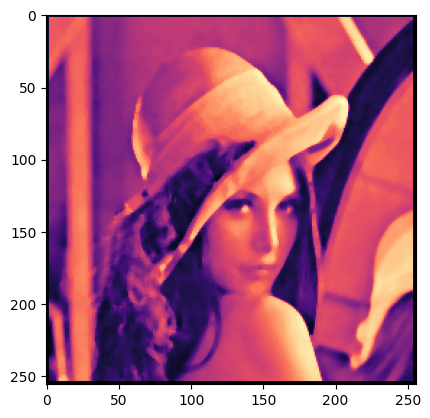

In [8]:
plt.imshow(medianfilter(lena, 5), "magma")


Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

In [9]:
filterlena_median = plt.imread("data/lena_medianfilter5.png")
assert numpy.allclose(filterlena_median, medianfilter(lena, 5), atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [10]:
import scipy.ndimage


**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

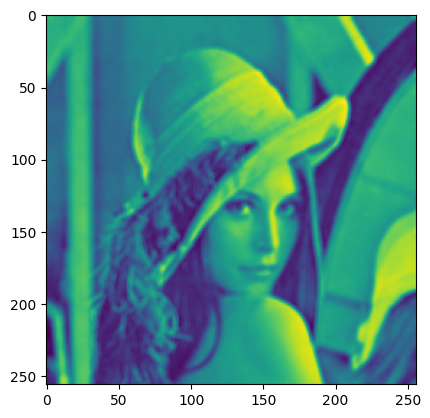

In [16]:
plt.imshow(scipy.ndimage.uniform_filter(lena, 4))

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

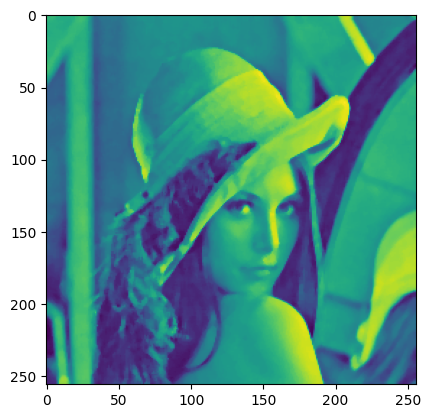

In [15]:
plt.imshow(scipy.ndimage.median_filter(lena, 4))

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

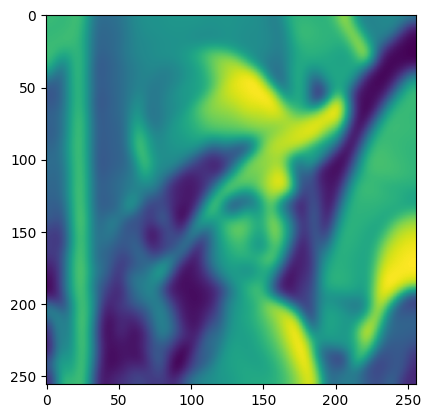

In [13]:
plt.imshow(scipy.ndimage.gaussian_filter(lena, 5))

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

keine Border, auch gerade Werte einsetzen möglich

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [31]:
def fastfilter(img, size):
    # write your code here
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    mean = 0
    for p in numpy.ndindex(img.shape[1]-2*n, img.shape[0]-2*n):
        slice = img[p[1]:p[1]+size, p[0]:p[0]+size]
        mean = slice.mean()
        result[p[1]+n, p[0]+n] = mean
    return result






**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

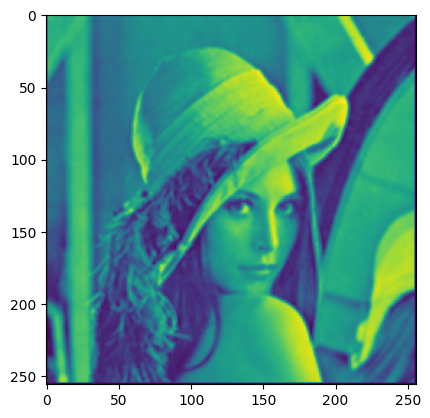

In [32]:
plt.imshow(fastfilter(lena, 3))

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

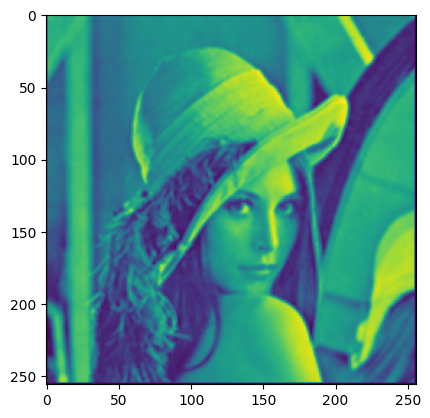

In [33]:
plt.imshow(meanfilter(lena, 3))

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [34]:
%timeit fastfilter(lena, 9)

444 ms ± 40.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation:

In [35]:
%timeit meanfilter(lena, 9)

3.43 s ± 104 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


444 ms vs. 3.43 s